In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os, sys
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

/Users/helena/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/helena/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/helena/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/helena/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

location data shape: (252004, 2)
max x: 16.161438395453875
max y: 16.378882323362305
min x: -16.161438395453875
min y: -16.378882323362305


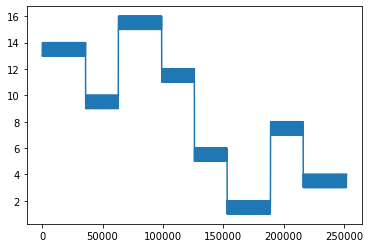

In [2]:
location = np.load('/Volumes/My Passport 1/mamimo_measurements/labels.npy')
print("location data shape:",location.shape)
location = preprocessing.scale(location)*10
print("max x:",max(location[:,0]))
print("max y:",max(location[:,1]))
print("min x:",min(location[:,0]))
print("min y:",min(location[:,1]))

#organizing the 2-D location labels into grid number lables
def grouping(loc):
    x = loc[0]
    y = loc[1]
    if x<-8:
        if y > 8: return 1
        elif y>0: return 5
        elif y>-8: return 9
        else: return 13
    elif x<0:
        if y > 8: return 2
        elif y>0: return 6
        elif y>-8: return 10
        else: return 14
    elif x<8:
        if y > 8: return 3
        elif y>0: return 7
        elif y>-8: return 11
        else: return 15
    else:
        if y > 8: return 4
        elif y>0: return 8
        elif y>-8: return 12
        else: return 16
                
label = list(map(grouping,location))
num = []
for i in range(1,17):
    num.append(label.count(i))
# plt.plot(range(1,17),num)
plt.plot(label)


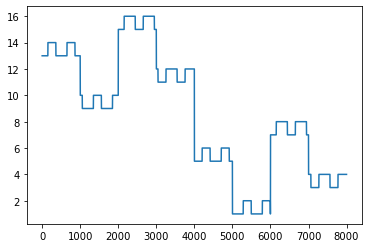

In [3]:
#taking data that covers all labeled locations: 
data_points = [[1000,2000],[50000,51000],[75000,76000],[100000,101000],[140000,141000],[160000,161000],[200000,201000],[230000,231000]]
data_loc = label[1000:2000]+label[50000:51000]+label[75000:76000]+label[100000:101000]+label[140000:141000]+label[160000:161000]+label[200000:201000]+label[230000:231000]
plt.plot(data_loc)


In [4]:
# NOTES: Slicing Method
# # x has shape [2, 3, 2]
# x = tf.constant([[[1., 2.], [3., 4. ], [5. , 6. ]],
#                  [[7., 8.], [9., 10.], [11., 12.]]])

# # Extracts x[0, 1:2, :] == [[[ 3.,  4.]]]
# res = tf.slice(x, [0, 1, 0], [1, 1, -1])

depth = 16
loc=tf.one_hot(data_loc, depth)
print(loc)
# tf.slice(loc,)
with tf.Session() as sess:  print(loc.eval()) 

Tensor("one_hot:0", shape=(8000, 16), dtype=float32)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
# from tensorflow.keras import layers
# # PREPARE THE DATA INTO test.npy, Real.npy, and Imag.npy.
# # Data shape: 601*64 (601 locations * 64 antennas)

# def generate_file_name(i):
#     count = len(str(i))
#     make_zeros = (6-count)*"0"
#     return "channel_measurement_"+make_zeros+str(i)+".npy"


# #Read in list of files. You might want to look into os.listdir()
# path= "/Volumes/My Passport 1/mamimo_measurements/channel_measurements_URA"
# once=True
# os.chdir(path)
# csi = []
# # csi.shape should be 8000*64*2
# for start, end in data_points:
#     for idx in range(start,end):
#         trace = generate_file_name(idx)
#         #get the 10th frequency CSI info from every antenna that are selected by data_points
#         inf_from_every_file = np.load(trace)[:,10]
#         cmplx = []
#         for num in inf_from_every_file:
#             cmplx.append(np.concatenate([[np.real(num),np.imag(num)]]))
#         cmplx = np.concatenate([cmplx])
#         csi.append(cmplx)
# csi = np.concatenate([csi])

os.chdir("/Volumes/My Passport 1/mamimo_measurements/prepare")
        
# with open('csi.npy','wb') as f:
#     np.save(f, csi)
with open('csi.npy', 'rb') as f:
    csi = np.load(f)
    print('success:',csi.shape)
    
# for trace in traces[1:]:
#     if count > 10:
        
#     idx = int((trace.split('_'))[-1][:6])
#     if data_point_select(idx):
        
#         #get the 10th frequency CSI info from every antenna that are selected by data_points
#         inf_from_every_file = np.load(trace)[:,10]
#         Real.append([[data.real for data in inf_from_every_file]])
#         Imag.append([[data.imag for data in inf_from_every_file]])
# Real = np.concatenate(Real)
# Imag = np.concatenate(Imag)
# os.chdir("../prepare")
# print(Real[:10])


# with open('Real.npy', 'wb') as f:
#     np.save(f, Real)
# with open('Imag.npy','wb') as f:
#     np.save(f, Imag)
# with open('Real.npy', 'rb') as f:
#     R = np.load(f)
#     print(R[1,1])
# with open('Imag.npy', 'rb') as f:
#     I = np.load(f)
#     print(I[1,1])
# with open('test.npy', 'rb') as f:
#     T = np.load(f)
#     print(T[1,1])


success: (8000, 64, 2)


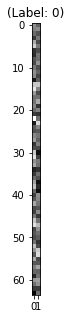

In [6]:
#plot csi matrix like a image as I am MAD
plt.figure(figsize=[5,5])

# Display the first csi_img in training data
plt.subplot(121)
curr_img = csi[0]
curr_lbl = np.argmax(loc[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: "+str(curr_lbl)+")")

plt.show()


In [7]:
from numpy import newaxis
#prepare datasets into training and testing

csi_shaped = csi[:, :, :, newaxis]
print("csi.shape:",csi.shape)
print('csi type:',type(csi))
y_before = np.concatenate([data_loc])
print(y_before.shape)
print(type(y_before))

csi.shape: (8000, 64, 2)
csi type: <class 'numpy.ndarray'>
(8000,)
<class 'numpy.ndarray'>


In [22]:
X_train, X_test, y_tr, y_te = train_test_split(csi_shaped, data_loc, test_size = 0.33)
depth = 16
y_train = tf.one_hot(y_tr, depth)
y_test  = tf.one_hot(y_te,depth)
tf.InteractiveSession()  # run an interactive session in Tf.
y_test = y_test.eval()
y_train = y_train.eval()

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5360, 64, 2, 1) (2640, 64, 2, 1)
(5360, 16) (2640, 16)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(64, 2)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

In [44]:
training_iters = 10
learning_rate = 0.001
batch_size = 64

#MNIST data input (img shape:64*2)
n_input = 64

#MNIST total classes 
n_classes = 16

#both placeholders are of type float
x = tf.placeholder("float", [None, 64, 2, 1])
y = tf.placeholder("float", [None, n_classes])

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2): 
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [41]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14(32*1) matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7(16*1) matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4(8*1).
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term.
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [40]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), #have 32 channels because passing in 32 convolutional filters
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('W3', shape=(8*1*128,128), initializer=tf.contrib.layers.xavier_initializer()),#44128 output of the previous layer; 128->neurons that you want in the fully connected layer
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()), #have 32 bias parameters
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

ValueError: Variable W0 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-10-40d273b59f6e>", line 2, in <module>
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),
  File "/Users/helena/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Users/helena/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):


In [45]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#Here, you check whether the index of the maximum value of the predicted image is equal to the actual labeled image. And both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()



In [46]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(X_train)//batch_size):
            batch_x = X_train[batch*batch_size:min((batch+1)*batch_size,len(X_train))]
            batch_y = y_train[batch*batch_size:min((batch+1)*batch_size,len(y_train))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: X_test,y : y_test})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()


Iter 0, Loss= 2.416927, Training Accuracy= 0.09375
Optimization Finished!
Testing Accuracy: 0.06705
Iter 1, Loss= 12.204795, Training Accuracy= 0.03125
Optimization Finished!
Testing Accuracy: 0.05227
Iter 2, Loss= 27.742737, Training Accuracy= 0.06250
Optimization Finished!
Testing Accuracy: 0.07348
Iter 3, Loss= 74.773407, Training Accuracy= 0.01562
Optimization Finished!
Testing Accuracy: 0.05492
Iter 4, Loss= 100.262283, Training Accuracy= 0.04688
Optimization Finished!
Testing Accuracy: 0.07083
Iter 5, Loss= 108.614357, Training Accuracy= 0.03125
Optimization Finished!
Testing Accuracy: 0.05606
Iter 6, Loss= 482.886902, Training Accuracy= 0.04688
Optimization Finished!
Testing Accuracy: 0.07083
Iter 7, Loss= 995.252747, Training Accuracy= 0.07812
Optimization Finished!
Testing Accuracy: 0.05038
Iter 8, Loss= 1490.359253, Training Accuracy= 0.09375
Optimization Finished!
Testing Accuracy: 0.10076
Iter 9, Loss= 5262.278320, Training Accuracy= 0.03125
Optimization Finished!
Testing A

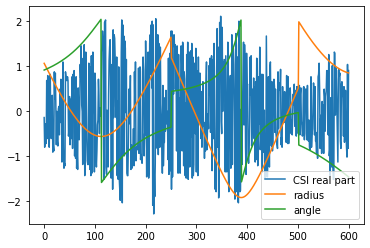

[[ 1.06413459  0.9151783 ]
 [ 1.04169282  0.91996995]
 [ 1.01931443  0.92482083]
 ...
 [ 0.8576048  -1.4372894 ]
 [ 0.85421991 -1.44626562]
 [ 0.85104382 -1.45525888]]


In [39]:

# '''
# 将经纬度转换为极坐标
# '''
# # 纬度latitude，经度longitude
# loc_x = list(location[:,0])
# loc_y = list(location[:,1])


# # 将直角坐标转换为极坐标，可以用坐标中最小的点为极点，也可以用(0,0)为极点
# # 半径
# def get_radius(x, y):
#     r = np.sqrt((x - x_min) ** 2 + (y - y_min) ** 2)
#     # r = np.sqrt((x **2+y **2))
#     return r


# # 角度
# def get_angle(x, y):
#     a = np.arctan((y - y_min) / (x - x_min)) * 180 / np.pi
#     # a = np.arctan(y / x * 180 / np.pi)
#     return a


# # 将最小的点设为极点
# # x_min = df['latitude'].values.min()
# # y_min = df['longitude'].values.min()
# x_min=0
# y_min=0
# radius = []
# angle = []

# for x, y in zip(loc_x, loc_y):
#     radius.append(get_radius(x, y))
#     angle.append(get_angle(x, y))

# radius = np.array(radius)
# angle = np.array(angle)

# # 保留小数点后8位
# # df['radius'] = radius.round(decimals=8)
# # df['angle'] = angle.round(decimals=8)
# radius = preprocessing.scale(radius.round(decimals=8))
# angle = preprocessing.scale(angle.round(decimals=8))

# plt.plot(R_10)
# plt.plot(radius)
# plt.plot(angle)
# plt.legend(['CSI real part','radius','angle'])
# plt.show()

# #change location
# location[:,0] = np.array(radius)
# location[:,1] = np.array(angle)
# print(location)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(location, R_10, test_size=0.33, random_state=42)

# Reserve 50 samples for validation
X_val = X_train[-50:]
y_val = y_train[-50:]
print("X_val.shape,y_val.shape",X_val.shape,y_val.shape)
X_train = X_train[:-50]
y_train = y_train[:-50]
print("X_train shape, y_train shape")
print(X_train.shape,y_train.shape)
# Preprocess the data (these are NumPy arrays)
print('before:')
print("x_test",X_test)
print("y_test",y_test)
print("x_test.shape,y_test.shape",X_test.shape,y_test.shape)
X_train1 = X_train.reshape(352, 2).astype("float32") 
X_test1 = X_test.reshape(199, 2).astype("float32") 
y_train1 = y_train.astype("float32")
y_test1 = y_test.astype("float32")
print('after:')
print("x_test",X_test1)
print("y_test" ,y_test1)
print("x_test.shape,y_test.shape",X_test.shape,y_test.shape)





X_val.shape,y_val.shape (50, 2) (50,)
X_train shape, y_train shape
(352, 2) (352,)
before:
x_test [[-0.55717585  2.00947384]
 [-1.52871776 -0.5779436 ]
 [ 1.08082674 -1.15653081]
 [-0.34411393  1.54004887]
 [ 0.15721743 -0.7353196 ]
 [ 0.30746747  0.50827061]
 [ 0.84271606  0.9658748 ]
 [-0.31958784 -0.12601706]
 [-0.35548116  1.55264721]
 [-1.33154544  0.89542373]
 [-0.03391772  1.29571717]
 [-0.55283169 -1.50248387]
 [-0.55610948  1.99420513]
 [ 0.8973526  -1.35743515]
 [-1.73485208  1.29399705]
 [ 1.26965966 -0.41374605]
 [ 0.42404565  1.08887309]
 [ 0.77851695 -0.52148933]
 [ 0.21240502 -0.7106105 ]
 [-0.43637395  1.65786098]
 [ 1.01931443  0.92482083]
 [ 0.90278628 -1.34868355]
 [ 1.44735061 -0.93928378]
 [ 0.86119786 -1.42833123]
 [-1.71817344  1.26595803]
 [ 1.39088938 -0.96584899]
 [-0.28337365  1.47898492]
 [-0.46942469 -1.25202449]
 [ 1.17621937 -1.08705379]
 [-1.12198728 -0.33180644]
 [ 0.86499848 -1.41939215]
 [-0.14341149 -0.90558918]
 [-0.39821267  1.60429105]
 [ 1.021855

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)